In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/Telco-Customer-Churn.csv")
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
print(df['Churn'].describe())

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object


In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

In [21]:
df[['MonthlyCharges','TotalCharges','tenure']].describe()

,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,32.421786
std,30.085974,2266.771362,24.545260
min,18.250000,18.800000,1.000000
25%,35.587500,401.450000,9.000000
50%,70.350000,1397.475000,29.000000
75%,89.862500,3794.737500,55.000000
max,118.750000,8684.800000,72.000000


In [22]:
churn_rate = (df['Churn'].value_counts(normalize=True)['Yes'])*100
print(f"Overall Churn rate: {churn_rate:.2f}%")

Overall Churn rate: 26.58%


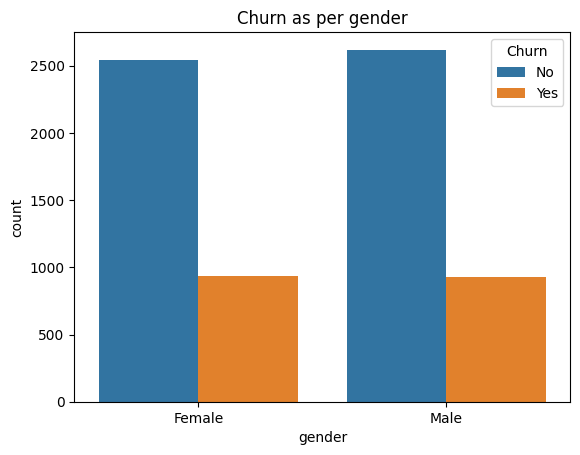

In [23]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn as per gender")
plt.show()

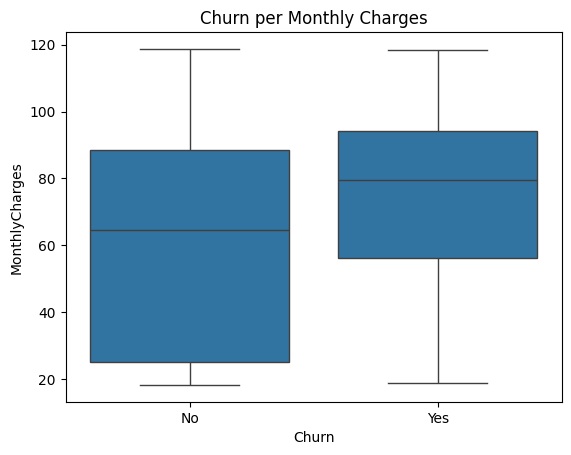

In [25]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn per Monthly Charges")
plt.show()

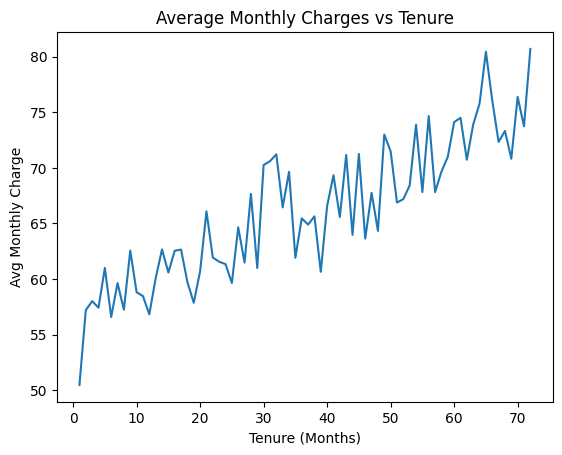

In [27]:
tenure_avg_charge = df.groupby('tenure')['MonthlyCharges'].mean()

plt.plot(tenure_avg_charge)
plt.title("Average Monthly Charges vs Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Avg Monthly Charge")
plt.show()


In [31]:
high_charges = df[df['MonthlyCharges']>80]
high_churn_rate = (high_charges['Churn'].value_counts(normalize=True)['Yes']) * 100
high_churn_rate

np.float64(33.99624765478424)

In [33]:
df.groupby('Contract')['tenure'].mean().sort_values(ascending=False)

Contract
Two year          57.071810
One year          42.073370
Month-to-month    18.036645
Name: tenure, dtype: float64

In [34]:
df['avgChurnPerMonth'] = df['TotalCharges'] / df['tenure']
df['avgChurnPerMonth'].head()

0    29.850000
1    55.573529
2    54.075000
3    40.905556
4    75.825000
Name: avgChurnPerMonth, dtype: float64

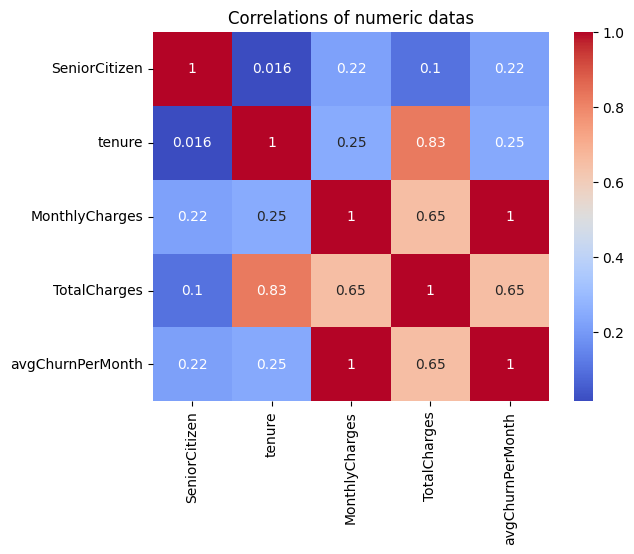

In [36]:
num_df = df.select_dtypes(include=['float64','int64'])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlations of numeric datas")
plt.show()

In [38]:
df['PaymentMethod'].value_counts()

ele_check = df[df['PaymentMethod'] == 'Electronic check'].shape[0]
ele_check

2365

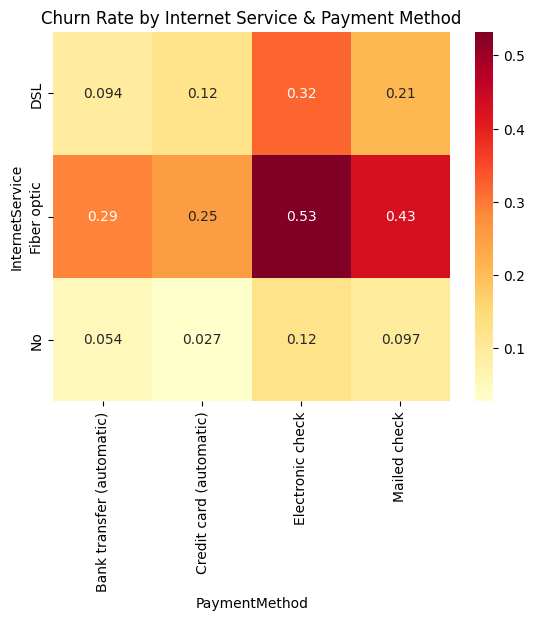

In [41]:
pivote = pd.pivot_table(df, values='customerID',
                        index='InternetService',
                        columns='PaymentMethod',
                        aggfunc=lambda x: (df.loc[x.index, 'Churn'] == 'Yes').mean()
                        )
sns.heatmap(pivote, annot=True, cmap='YlOrRd')
plt.title("Churn Rate by Internet Service & Payment Method")
plt.show()

In [42]:
quartiles = df['tenure'].quantile([0.25, 0.5, 0.75])
quartiles

0.25     9.0
0.50    29.0
0.75    55.0
Name: tenure, dtype: float64

In [44]:
df['LoyaltyFlag'] = (df['tenure'] > 24).astype(int)
df['LoyaltyFlag'].value_counts()

LoyaltyFlag
1    3833
0    3199
Name: count, dtype: int64

In [45]:
multi_services = ['PhoneService','MultipleLines','InternetService',
                'OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies']

for col in multi_services:
    print(f"{col}:\n", df[col].value_counts(), "\n")

PhoneService:
 PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

MultipleLines:
 MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

InternetService:
 InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

OnlineSecurity:
 OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

OnlineBackup:
 OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 

DeviceProtection:
 DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64 

TechSupport:
 TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64 

StreamingTV:
 StreamingTV
No                     2809
Yes                    2703
No internet s